# Determining the age of buyers

The main take of the project is to determine the age of supermarket customers. This will improve product recommendations for age categories of people and improve control over the sale of alcoholic beverages to kids.

## Research data analysis

To begin with, let's look at the available selection of photos.

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facedc3c610>]],
      dtype=object)

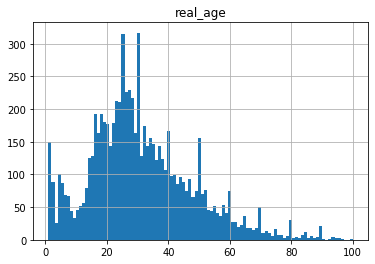

In [3]:
labels.hist(bins=100)

We can say that the age has  normal distributed. What will positively affect the training of the model

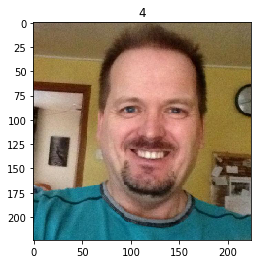

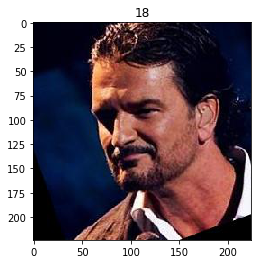

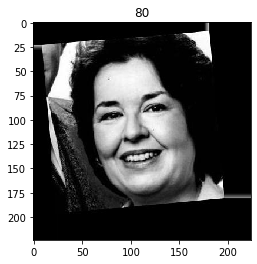

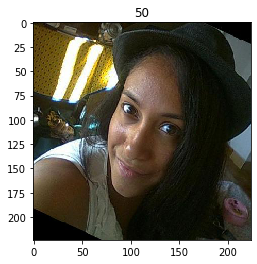

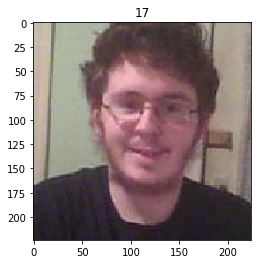

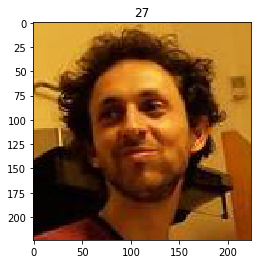

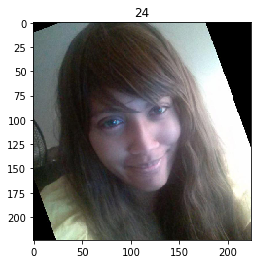

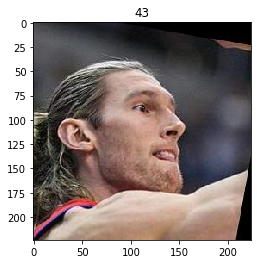

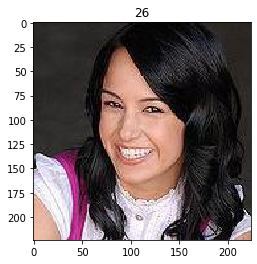

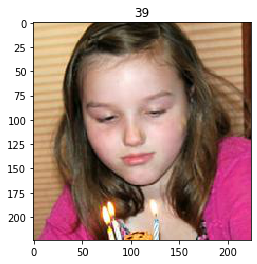

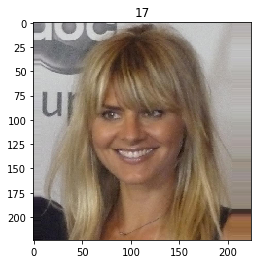

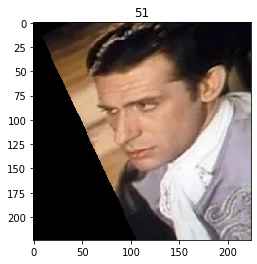

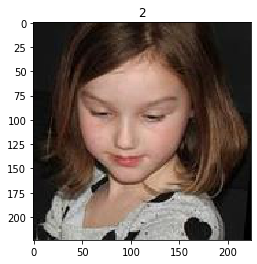

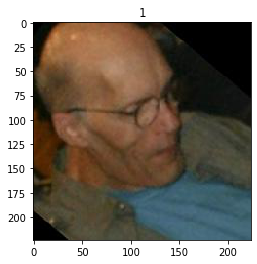

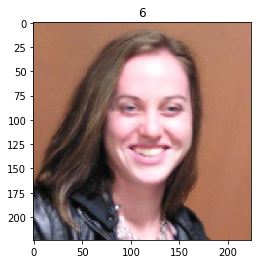

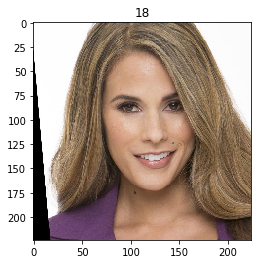

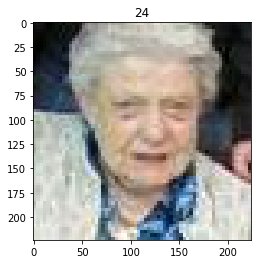

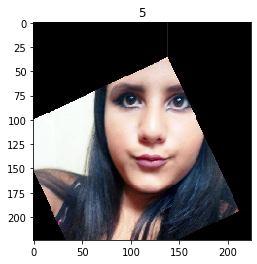

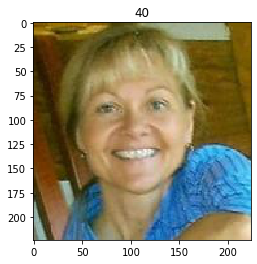

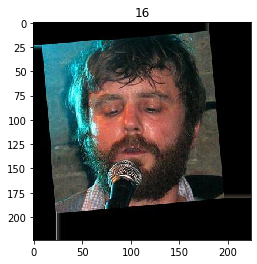

In [9]:
for i in list(range(20)):
    plt.imshow(train_gen_flow[i][0][0])
    plt.title(labels['real_age'][i])
    plt.show()

Based on the results of the sample analysis, the following conclusions can be drawn:
- Different age groups are represented, which positively affects the quality of the model's training.
- Some photos are not of the best quality, which can negatively affect learning.
- In some photos, people's faces are not fully visible. This is rather a plus, since the model will learn to determine age not only in full-face photos.

## Model Training

To train the model, the capacities of 'Yandex.practicum' with specific design requirements were used, so the code and output are presented as text cells.

```python

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def load_train(path):
    target_train = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.,
                                       horizontal_flip=True, vertical_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=target_train,
                                                           directory=path + 'final_files/',
                                                           x_col='file_name',
                                                           y_col='real_age',
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='raw', subset='training',
                                                           seed=12345)
    return train_datagen_flow


def load_test(path):
    target_val = pd.read_csv(path + 'labels.csv')
    val_datagen = ImageDataGenerator(validation_split=0.25, rescale=1 / 255.)
    val_datagen_flow = val_datagen.flow_from_dataframe(dataframe=target_val,
                                                       directory=path + 'final_files/',
                                                       x_col='file_name',
                                                       y_col='real_age',
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='raw',
                                                       subset='validation', seed=12345)
    return val_datagen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data, validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model


```

```

2021-10-15 10:08:48.859090: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2021-10-15 10:08:49.314733: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2021-10-15 10:09:04.394693: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-15 10:09:05.092789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-10-15 10:09:05.092896: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-15 10:09:05.092928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-15 10:09:05.466768: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-10-15 10:09:05.559519: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-10-15 10:09:06.235078: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-10-15 10:09:06.285977: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-10-15 10:09:06.286129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-10-15 10:09:06.291012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-10-15 10:09:06.291409: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-10-15 10:09:06.440993: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2021-10-15 10:09:06.448059: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x51aebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-15 10:09:06.448110: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-15 10:09:06.839672: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5234be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-10-15 10:09:06.839709: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2021-10-15 10:09:06.842144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-10-15 10:09:06.842208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-15 10:09:06.842218: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-15 10:09:06.842246: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-10-15 10:09:06.842256: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-10-15 10:09:06.842264: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-10-15 10:09:06.842274: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-10-15 10:09:06.842281: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-10-15 10:09:06.846843: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-10-15 10:09:06.859714: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-15 10:09:12.987068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-10-15 10:09:12.987129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2021-10-15 10:09:12.987140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2021-10-15 10:09:13.000401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2021-10-15 10:09:50.334219: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-15 10:09:54.316644: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 124s - loss: 259.3862 - mae: 11.8151 - val_loss: 983.9296 - val_mae: 26.6403
Epoch 2/10
178/178 - 39s - loss: 105.4058 - mae: 7.7245 - val_loss: 823.1851 - val_mae: 23.6533
Epoch 3/10
178/178 - 39s - loss: 78.3205 - mae: 6.7108 - val_loss: 223.5018 - val_mae: 11.5544
Epoch 4/10
178/178 - 39s - loss: 63.3797 - mae: 6.0300 - val_loss: 130.9041 - val_mae: 8.6921
Epoch 5/10
178/178 - 40s - loss: 50.4082 - mae: 5.4276 - val_loss: 97.9727 - val_mae: 7.3371
Epoch 6/10
178/178 - 39s - loss: 45.1642 - mae: 5.1396 - val_loss: 74.0800 - val_mae: 6.4345
Epoch 7/10
178/178 - 39s - loss: 39.2099 - mae: 4.6970 - val_loss: 80.4608 - val_mae: 6.9066
Epoch 8/10
178/178 - 38s - loss: 33.6913 - mae: 4.4172 - val_loss: 99.3801 - val_mae: 7.3798
Epoch 9/10
178/178 - 39s - loss: 29.4997 - mae: 4.1115 - val_loss: 100.2447 - val_mae: 7.6207
Epoch 10/10
178/178 - 39s - loss: 26.3680 - mae: 3.9323 - val_loss: 75.2376 - val_mae: 6.3714

```

## Analysis of the trained model

Using the ResNet50 architecture with prepaid weights, optimizing with the Adam algorithm with learningRate = 0.0001, we managed to get the result in the form of a target metric of MAE less than 7. Which is a good result.